<div align="center" style="line-height: 1.2;">

### **BCSE417P Lab Assignment 1**

#### **Name**: SreeDananjay S

#### **Reg No**: 21BAI1807

##### **Aug 16, 2024**

##### By turning in this assignment, I agree and declare that all of this is my own work.

</div>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1A
## Task 1: Basic Image Statistics and Color Space Conversion
**Objective:**
Compute basic statistics and convert an image into different color spaces.


Mean for Blue channel: 185.47
Mean for Green channel: 108.79
Mean for Red channel: 100.99
Standard Deviation for Blue channel: 41.75
Standard Deviation for Green channel: 41.71
Standard Deviation for Red channel: 61.75


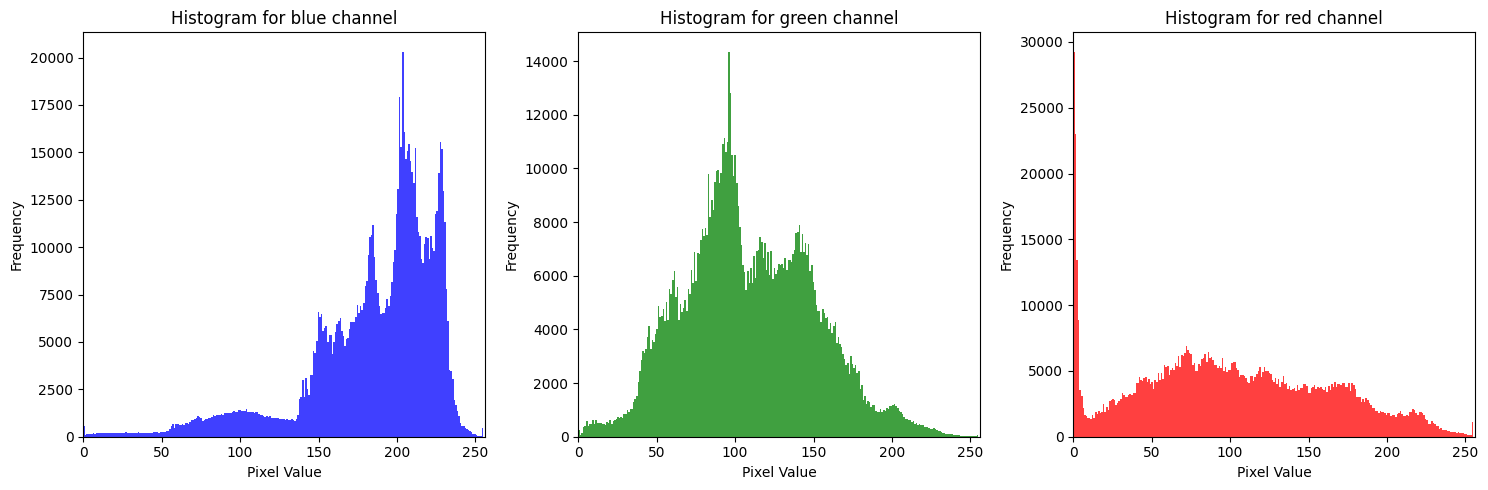

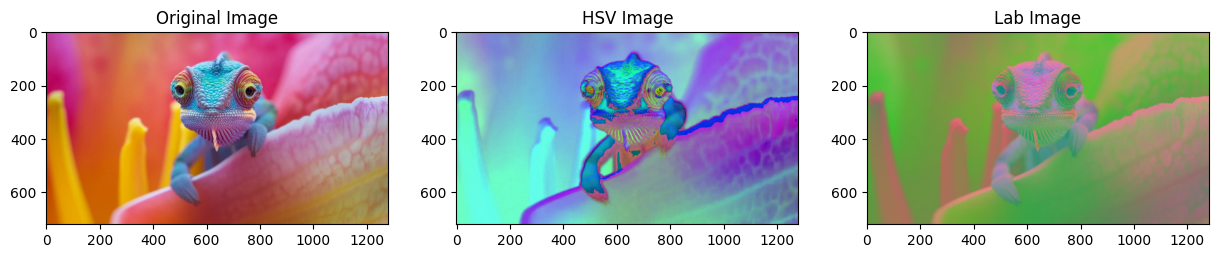

In [29]:
# Step 1: Read the Image
image = plt.imread('../images/colorImage.webp')

# Step 2: Compute Basic Statistics
means, std_devs = cv2.meanStdDev(image)
means = means.flatten()
std_devs = std_devs.flatten()

print(f"Mean for Blue channel: {means[0]:.2f}")
print(f"Mean for Green channel: {means[1]:.2f}")
print(f"Mean for Red channel: {means[2]:.2f}")

print(f"Standard Deviation for Blue channel: {std_devs[0]:.2f}")
print(f"Standard Deviation for Green channel: {std_devs[1]:.2f}")
print(f"Standard Deviation for Red channel: {std_devs[2]:.2f}")

# Step 3: Calculate and plot histograms for each color channel separately using plt.hist
colors = ('blue', 'green', 'red')
channels = cv2.split(image)
plt.figure(figsize=(15, 5))

for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.subplot(1, 3, i + 1)
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.75)
    plt.title(f'Histogram for {color} channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# Step 4: Convert Color Spaces
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Display the images without converting to RGB
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')
plt.subplot(1, 3, 3)
plt.imshow(image_lab)
plt.title('Lab Image')
plt.show()


## Basic Statistics:
Computing basic statistics such as mean, standard deviation, minimum, and maximum values for each color channel (R, G, B) helps provide a more detailed understanding of the image's characteristics.

- #### Mean (Average Intensity):
The mean represents the average pixel intensity value for each channel.
Inference: A higher mean value for a channel indicates that the channel is brighter on average. For example, if the mean of the Red channel is significantly higher than that of the Green and Blue channels, the image may have a reddish cast.
- #### Standard Deviation (Contrast/Spread):
The standard deviation measures the spread of pixel intensities around the mean. A high standard deviation means the pixel intensities are widely spread, indicating higher contrast, while a low standard deviation suggests less contrast.
Inference: Images with a low standard deviation in a particular channel may appear flat or washed out in that color, while a high standard deviation suggests strong contrast, with more variation in intensity.
- #### Minimum and Maximum Values:
The minimum and maximum values represent the darkest and brightest pixel intensities in the image for each channel.
Inference: The range between the minimum and maximum values can give insight into the dynamic range of the image. If the minimum value is far from 0 or the maximum value is far from 255, it suggests that the image might not be fully utilizing the available intensity range, which could result in a less dynamic image.

## Histogram of an RGB Image
Color Channel Histograms: The histogram of an RGB image can be calculated separately for the Red, Green, and Blue channels. Each histogram shows the frequency of pixel intensities (0 to 255) within each channel.
- #### Intensity Distribution: 
The histogram reveals how pixel intensities are distributed across each channel. A well-spread histogram indicates that the image uses a wide range of intensities, which usually corresponds to better contrast. If the histogram is clustered around certain intensity values, it indicates limited contrast or a dominance of particular shades in that channel.
- #### Color Balance: 
Comparing the histograms of the R, G, and B channels can give insights into the color balance of the image. For example, if the histogram for the red channel is skewed towards higher values while the blue channel is skewed towards lower values, the image may have a reddish tint.

## HSV (Hue, Saturation, Value) Color Space
- #### Color Segmentation: 
The HSV color space is particularly useful for color-based segmentation and object detection because it separates color information from lighting variations. By working in the Hue channel, you can effectively detect colors without worrying about shadows or highlights.
- #### Brightness Independence: 
In applications where brightness can vary (e.g., outdoor scenes with changing lighting conditions), the HSV color space is more robust than RGB for maintaining consistent color detection.
## Lab (Lab) Color Space
- #### Color Representation: 
The Lab color space consists of three channels: L* for lightness, a* for the green-red component, and b* for the blue-yellow component. Unlike RGB and HSV, Lab is designed to be perceptually uniform, meaning that a change of the same amount in color value should result in a change of the same visual importance.
- #### Color Consistency: 
The Lab color space is useful in applications where color consistency is critical, such as color correction and matching, because it is designed to be more aligned with human vision. Small changes in Lab values correspond to small changes in perceived color, making it more accurate for tasks that require precise color manipulation.
- #### Illumination Invariance: 
Since Lab separates the luminance (lightness) from color information (a* and b* channels), it can be more robust against illumination changes than RGB. This makes it effective for tasks like texture analysis and edge detection in varying lighting conditions.

## Task 2: Simple Image Segmentation Using Thresholding

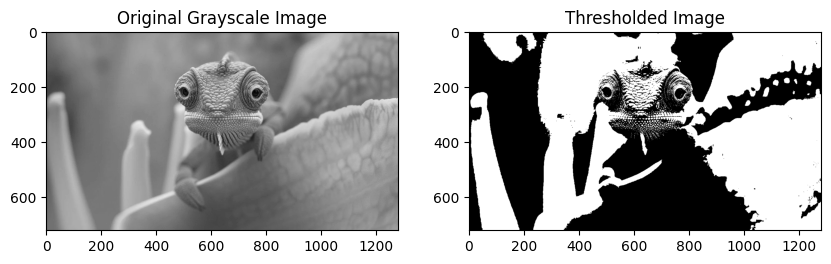

In [5]:
# Step 1: Read the Image
gray_image = cv2.imread('../images/colorImage.webp', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Step 3: Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.show()

### Inference:
The chosen thresholding method effectively seperated the light regions from the dark ones created an outline of the object in the image

## Task 3: Color-Based Segmentation

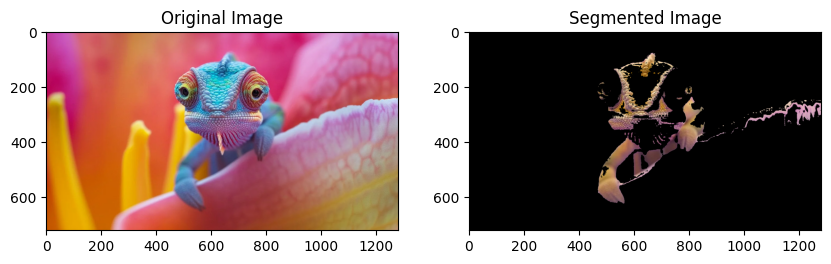

In [32]:
# Step 1: Read the Image
color_image = cv2.imread('../images/colorImage.webp')
image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Step 2: Convert to HSV
image_hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Step 3: Define color range for blue and apply color thresholding
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
segmented_image = cv2.bitwise_and(color_image, color_image, mask=mask)

# Step 4: Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2) 
# plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()

#### Color based thresholding:
This thresholding method enabled the segregation of a particular color in the given image. The chosen color was effectively isolated from the rest of the image, highlighting the regions with the specified color.

# Assignment 1B
##  Task 1: Image Negative Transformation
**Objective:** Create an image negative using Python.

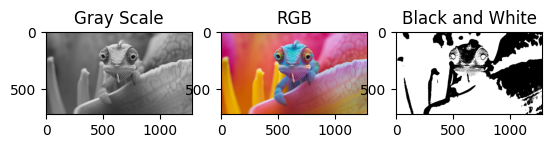

In [7]:
img_bgr = cv2.imread('../images/colorImage.webp')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gs = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
(thresh, img_bw) = cv2.threshold(img_gs, 127, 255, cv2.THRESH_BINARY)
img_bw//=255
f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(img_gs,cmap='gray')
plt.title('Gray Scale')
f.add_subplot(1,3, 2)
plt.imshow(img_rgb)
plt.title('RGB')
f.add_subplot(1,3, 3)
plt.imshow(img_bw,cmap='binary')
plt.title('Black and White')
plt.show(block=True)

In [8]:
# Negative Transform
def negativeLT(img,bit):
    L = 2**bit
    return L-1-img

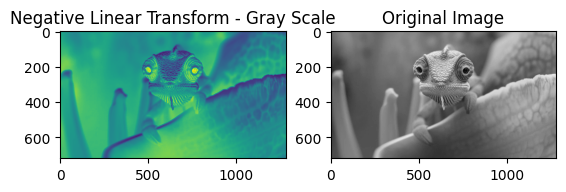

In [9]:
# Load Gray Scale Image
img = img_gs
# Apply the image negative transformation.
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(negativeLT(img,8))
plt.title('Negative Linear Transform - Gray Scale')
f.add_subplot(1,2, 2)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.show(block=True)

### Inference:
The image negative transformation effectively inverted the pixel intensities of the image, resulting in a negative version of the original image. This transformation is useful for enhancing the contrast and visualizing details in an image.

## Task 2: Gamma Correction
**Objective:** Apply gamma correction with different gamma values.

In [10]:
def powerT(img,c,gamma):
    img = c*((img/255)**gamma)
    img = np.clip(img * 255.0, 0, 255)
    return np.int32(img)

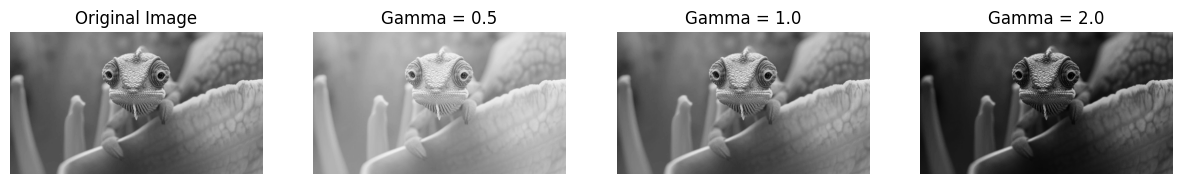

In [11]:
# Load Gray Scale Image
img = img_gs
# Apply gamma correction with γ=0.5,γ=1.0,γ=2.0.
gamma_values = [0.5, 1.0, 2.0]
corrected_images = [powerT(img, 1, gamma) for gamma in gamma_values]
# Plot the original and corrected images
f, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
for i, (gamma, corrected_img) in enumerate(zip(gamma_values, corrected_images)):
    axs[i + 1].imshow(corrected_img, cmap='gray')
    axs[i + 1].set_title(f'Gamma = {gamma}')
    axs[i + 1].axis('off')
plt.show()

### Inference for Gamma correction:
Gamma correction with different gamma values can be used to adjust the brightness and contrast of an image. Lower gamma values (<1) can enhance the brightness of dark regions, while higher gamma values (>1) can enhance the contrast and details in bright regions. By adjusting the gamma value, you can control the overall brightness and contrast of an image to achieve the desired visual effect.

## Task 3: Log Transform
**Objective:** Apply log transformation to enhance an image.

In [12]:
def LogT(img,c):
    img = img/255.0
    img = c*np.log(img+1)
    img = np.clip(img * 255.0, 0, 255)
    return np.int32(img)

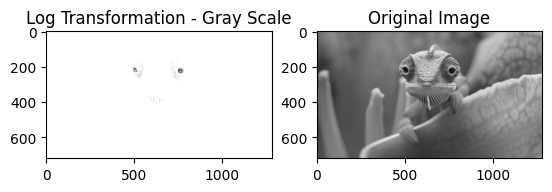

In [13]:
# Load Gray Scale Image
img = img_gs
# Apply the Log transformation.
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(LogT(img,8), cmap='gray')
plt.title('Log Transformation - Gray Scale')
f.add_subplot(1,2, 2)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.show(block=True)

### Inference for Log transformation:
The log transformation is useful for enhancing the contrast of an image, especially when the pixel intensities are concentrated in a narrow range. By applying the log transformation, you can spread out the intensity values, resulting in a visually enhanced image with improved contrast and details. This transformation is particularly effective for images with low contrast or limited dynamic range.

##  Task 4: Compare Transformations
**Objective:** Compare the effects of different transformations.

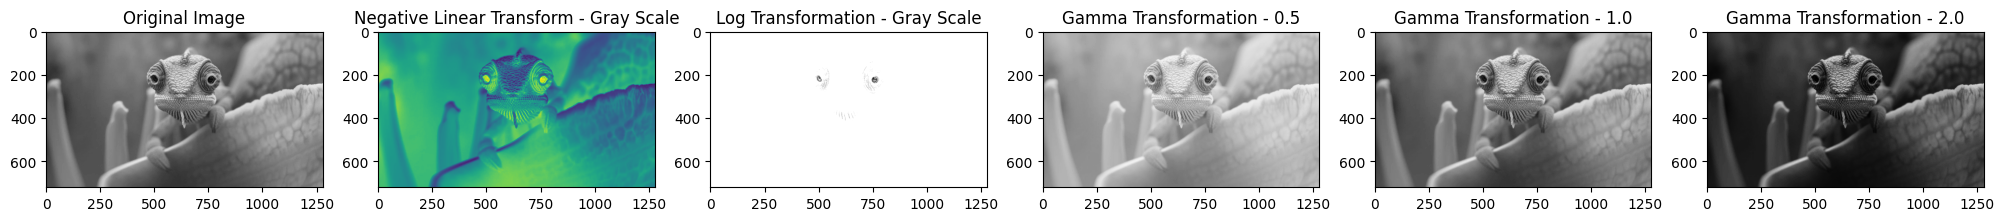

In [14]:
# Load Gray Scale Image
img = img_gs

#Compare Transformations
plt.figure(figsize=(25, 5))
plt.subplot(1, 6, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 6, 2)
plt.imshow(negativeLT(img,8))
plt.title('Negative Linear Transform - Gray Scale')
plt.subplot(1, 6, 3)
plt.imshow(LogT(img,8), cmap='gray')
plt.title('Log Transformation - Gray Scale')
plt.subplot(1, 6, 4)
plt.imshow(corrected_images[0], cmap='gray')
plt.title('Gamma Transformation - 0.5')
plt.subplot(1, 6, 5)
plt.imshow(LogT(img,8))
plt.imshow(corrected_images[1], cmap='gray')
plt.title('Gamma Transformation - 1.0')
plt.subplot(1, 6, 6)
plt.imshow(corrected_images[2], cmap='gray')
plt.title('Gamma Transformation - 2.0')
plt.show()

### Comparing Transformations:
- **Image Negative:** Inverts the pixel intensities, creating a negative version of the image.
- **Gamma Correction:** Adjusts the brightness and contrast of an image by applying a power-law transformation with different gamma values.
- **Log Transformation:** Enhances the contrast of an image by spreading out the intensity values using the logarithmic function.

## Task 5: Apply Transformations to Color Images
**Objective:** Apply the transformations to a color image by processing each channel separately.

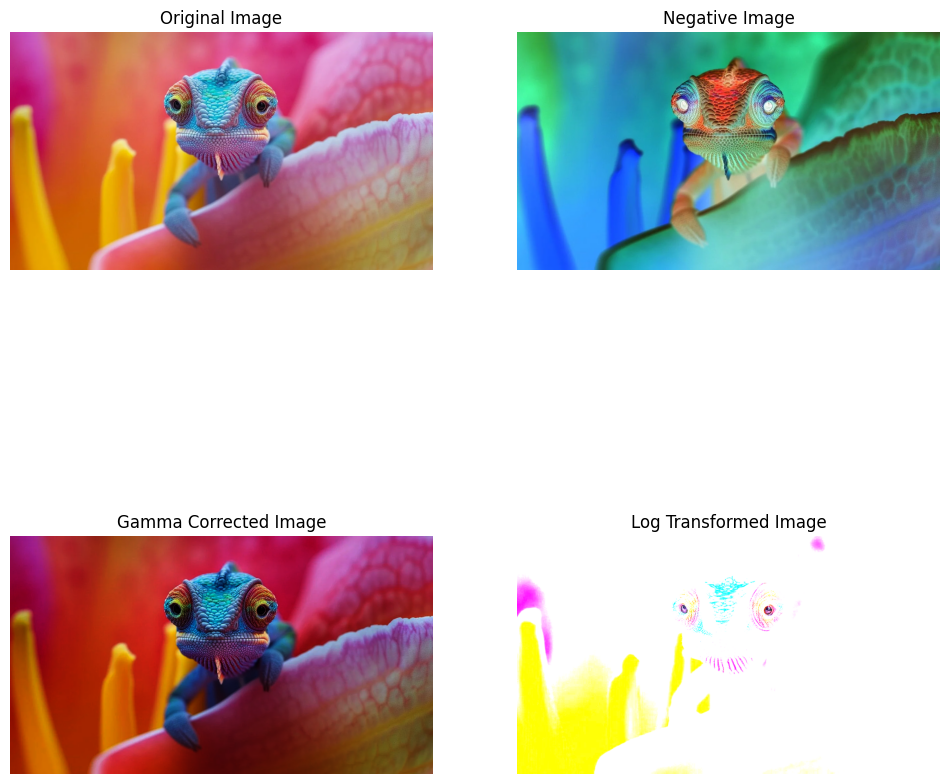

In [15]:
# Load a color image
image = cv2.imread('../images/colorImage.webp')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its R, G, and B channels
R, G, B = cv2.split(image_rgb)

# Apply transformations to each channel
R_neg = negativeLT(R,8)
G_neg = negativeLT(G,8)
B_neg = negativeLT(B,8)

R_gamma = powerT(R,1,2.0)
G_gamma = powerT(G,1,2.0)
B_gamma = powerT(B,1,2.0)

R_log = LogT(R,8)
G_log = LogT(G,8)
B_log = LogT(B,8)

# Merge the channels back together
image_neg = cv2.merge([R_neg, G_neg, B_neg])
image_gamma = cv2.merge([R_gamma, G_gamma, B_gamma])
image_log = cv2.merge([R_log, G_log, B_log])

# Display the original and the transformed images
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(image_neg)
axs[0, 1].set_title('Negative Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(image_gamma)
axs[1, 0].set_title('Gamma Corrected Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(image_log)
axs[1, 1].set_title('Log Transformed Image')
axs[1, 1].axis('off')

plt.show()

## *Assignment 1C*


#### **Task1: Introduction to Histogram Equalization**

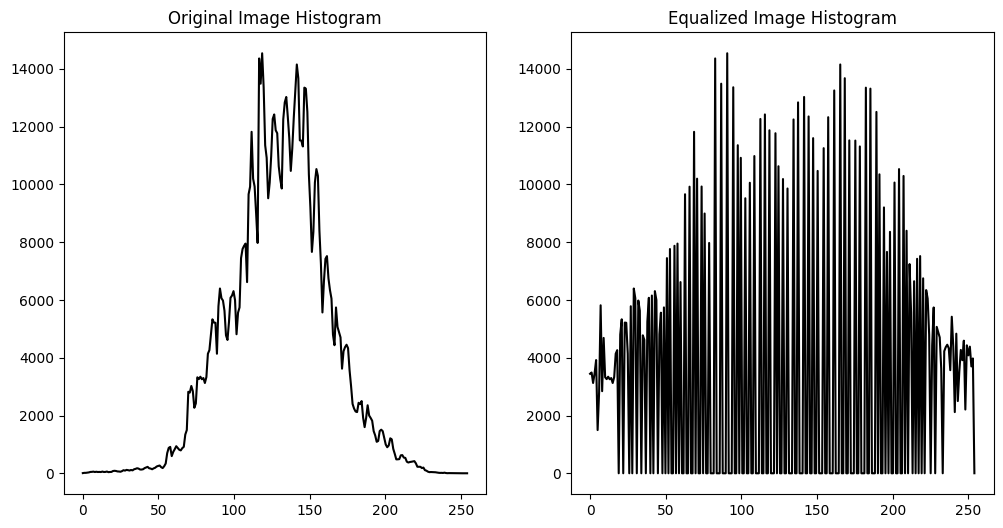

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image using PIL
image = Image.open('../images/colorImage.webp').convert('L')
image_np = np.array(image)

# Step 1: Calculate the histogram
histogram, bin_edges = np.histogram(image_np, bins=256, range=(0, 255))

# Step 2: Calculate the Cumulative Distribution Function (CDF)
cdf = histogram.cumsum()
cdf_normalized = 255 * cdf / cdf[-1]  # Normalize to range [0, 255]

# Step 3: Apply histogram equalization
equalized_image_np = np.interp(image_np.flatten(), bin_edges[:-1], cdf_normalized).reshape(image_np.shape).astype(np.uint8)

# Convert numpy array back to an image
equalized_image = Image.fromarray(equalized_image_np)

# Step 4: Calculate the histogram of the equalized image
equalized_histogram, _ = np.histogram(equalized_image_np, bins=256, range=(0, 255))

# Step 5: Display results
plt.figure(figsize=(12, 6))

# Original Image Histogram
plt.subplot(1, 2, 1)
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Original Image Histogram")

# Equalized Image Histogram
plt.subplot(1, 2, 2)
plt.plot(bin_edges[0:-1], equalized_histogram, color='black')
plt.title("Equalized Image Histogram")

plt.show()

### Inference:
Histogram equalization is a technique used to enhance the contrast of an image by redistributing the pixel intensities to cover the full intensity range. By equalizing the histogram, you can improve the visual appearance of the image, making it more vibrant and detailed. This technique is particularly useful for images with low contrast or limited dynamic range.

#### **Task2: Comparing Histogram Equlization techniques**

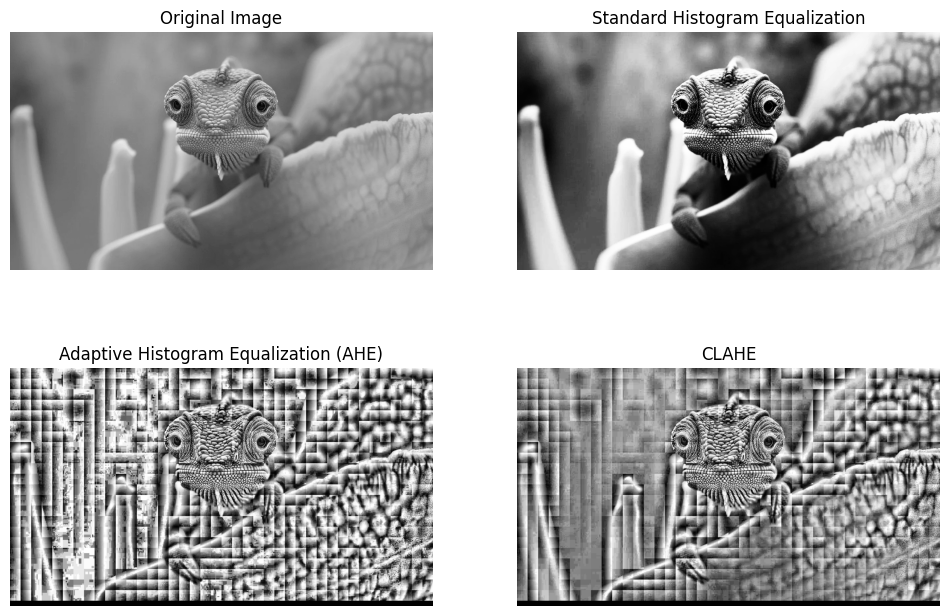

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = Image.open('../images/colorImage.webp').convert('L')
image_np = np.array(image)

# 1. Standard Histogram Equalization (as implemented before)
def standard_hist_eq(image_np):
    histogram, bin_edges = np.histogram(image_np, bins=256, range=(0, 255))
    cdf = histogram.cumsum()
    cdf_normalized = 255 * cdf / cdf[-1]
    equalized_image_np = np.interp(image_np.flatten(), bin_edges[:-1], cdf_normalized).reshape(image_np.shape)
    return equalized_image_np.astype(np.uint8)

# 2. Adaptive Histogram Equalization (AHE)
def adaptive_hist_eq(image_np, tile_size=8):
    height, width = image_np.shape
    output_image = np.zeros_like(image_np)
    
    # Calculate the number of tiles
    tiles_x = width // tile_size
    tiles_y = height // tile_size
    
    for i in range(tiles_y):
        for j in range(tiles_x):
            # Extract the tile
            x_start = j * tile_size
            y_start = i * tile_size
            tile = image_np[y_start:y_start + tile_size, x_start:x_start + tile_size]
            
            # Apply histogram equalization to the tile
            tile_eq = standard_hist_eq(tile)
            
            # Place the equalized tile back into the output image
            output_image[y_start:y_start + tile_size, x_start:x_start + tile_size] = tile_eq
            
    return output_image

# 3. Contrast Limited Adaptive Histogram Equalization (CLAHE)
def clahe(image_np, tile_size=8, clip_limit=40):
    height, width = image_np.shape
    output_image = np.zeros_like(image_np)
    
    # Calculate the number of tiles
    tiles_x = width // tile_size
    tiles_y = height // tile_size
    
    for i in range(tiles_y):
        for j in range(tiles_x):
            # Extract the tile
            x_start = j * tile_size
            y_start = i * tile_size
            tile = image_np[y_start:y_start + tile_size, x_start:x_start + tile_size]
            
            # Compute histogram
            histogram, bin_edges = np.histogram(tile, bins=256, range=(0, 255))
            
            # Clip histogram values to limit contrast
            excess_pixels = histogram[histogram > clip_limit] - clip_limit
            histogram[histogram > clip_limit] = clip_limit
            histogram += excess_pixels.sum() // 256  # Redistribute excess pixels
            
            # Calculate CDF and apply equalization
            cdf = histogram.cumsum()
            cdf_normalized = 255 * cdf / cdf[-1]
            tile_clahe = np.interp(tile.flatten(), bin_edges[:-1], cdf_normalized).reshape(tile.shape)
            
            # Place the equalized tile back into the output image
            output_image[y_start:y_start + tile_size, x_start:x_start + tile_size] = tile_clahe
            
    return output_image

# Apply the three methods
standard_eq_image = standard_hist_eq(image_np)
ahe_image = adaptive_hist_eq(image_np, tile_size=32)
clahe_image = clahe(image_np, tile_size=32, clip_limit=40)

# Display the results side by side
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(standard_eq_image, cmap='gray')
plt.title("Standard Histogram Equalization")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(ahe_image, cmap='gray')
plt.title("Adaptive Histogram Equalization (AHE)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(clahe_image, cmap='gray')
plt.title("CLAHE")
plt.axis('off')

plt.show()


### Inference for Histogram Equalization Techniques:
- **Global Histogram Equalization:** Enhances the contrast of the entire image by redistributing the pixel intensities across the full intensity range. This method is effective for improving the overall contrast and brightness of an image.

- **Adaptive Histogram Equalization:** Divides the image into smaller regions and performs histogram equalization locally. This method is useful for enhancing the contrast of images with varying lighting conditions or regions of interest. By applying adaptive histogram equalization, you can achieve better contrast enhancement in specific areas of the image.

- **CLAHE (Contrast Limited Adaptive Histogram Equalization):** Improves upon adaptive histogram equalization by limiting the contrast enhancement in each region. This prevents over-amplification of noise and artifacts, resulting in a more visually pleasing image. CLAHE is particularly effective for images with high dynamic range and varying lighting conditions.

#### **Task3: Implementing histogram equalization on color images**

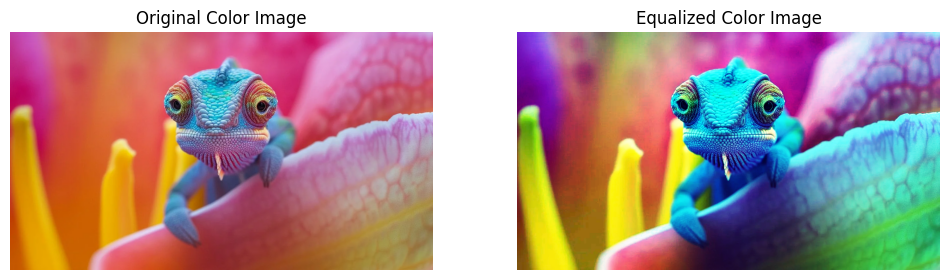

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load color image
image = Image.open('../images/colorImage.webp')
image_np = np.array(image)

# Step 1: Separate the color channels
red_channel, green_channel, blue_channel = image_np[:, :, 0], image_np[:, :, 1], image_np[:, :, 2]

# Function for histogram equalization on a single channel
def histogram_equalization(channel):
    histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 255))
    cdf = histogram.cumsum()
    cdf_normalized = 255 * cdf / cdf[-1]
    equalized_channel = np.interp(channel.flatten(), bin_edges[:-1], cdf_normalized).reshape(channel.shape)
    return equalized_channel.astype(np.uint8)

# Step 2: Apply histogram equalization to each channel
red_eq = histogram_equalization(red_channel)
green_eq = histogram_equalization(green_channel)
blue_eq = histogram_equalization(blue_channel)

# Step 3: Reconstruct the color image by combining the equalized channels
equalized_image_np = np.stack((red_eq, green_eq, blue_eq), axis=2)
equalized_image = Image.fromarray(equalized_image_np)

# Step 4: Display the original and equalized color images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Color Image")
plt.axis('off')

plt.show()

#### **Task4: Histogram equalization in different applications**

Text(0.5, 1.0, 'Equalized Image')

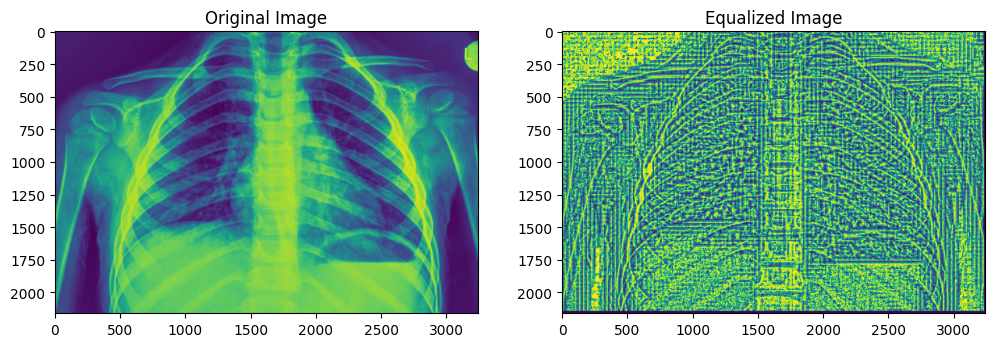

In [19]:
image = Image.open("../images/xray.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = adaptive_hist_eq(image_np,32)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in medical imaging:
- **Enhancing Image Contrast:** Histogram equalization can improve the contrast of medical images, making it easier to visualize structures and abnormalities. By redistributing the pixel intensities, you can enhance the details and features in the image, aiding in diagnosis and analysis.

Text(0.5, 1.0, 'Equalized Image')

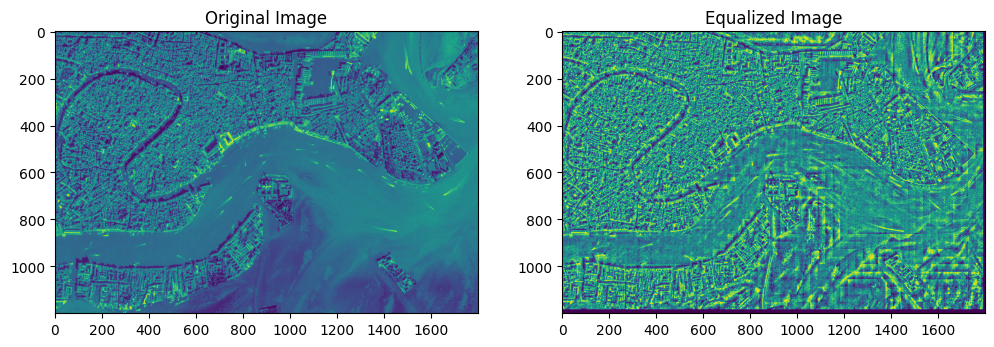

In [20]:
image = Image.open("../images/satellite.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = clahe(image_np,32,40)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in satellite imaging:
- **Improving Image Quality:** Histogram equalization can enhance the quality of satellite images by increasing the contrast and visibility of features on the ground. This can be useful for applications such as land cover classification, object detection, and environmental monitoring, where detailed and clear images are essential.

Text(0.5, 1.0, 'Equalized Image')

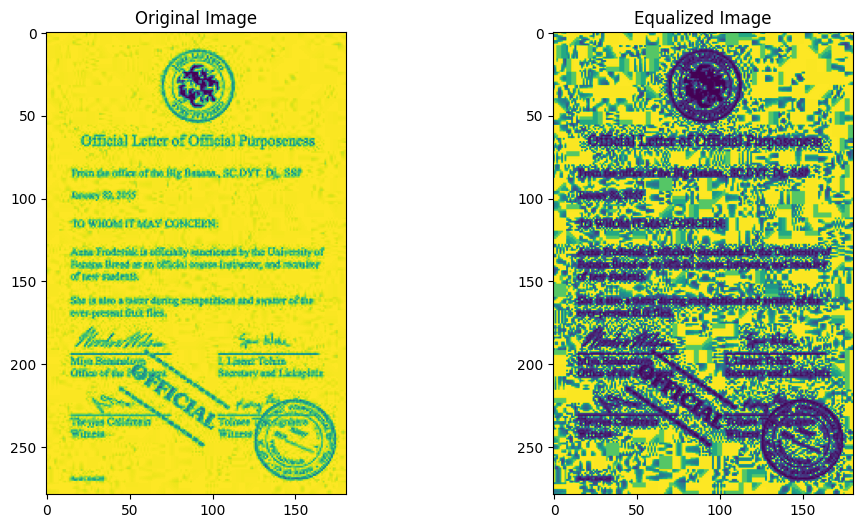

In [21]:
image = Image.open("../images/document.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in document imaging:
- **Enhancing Text Readability:** Histogram equalization can improve the readability of text in document images by enhancing the contrast between the text and background. By equalizing the histogram, you can make the text more prominent and easier to read, which is beneficial for optical character recognition (OCR) and document analysis tasks.

Text(0.5, 1.0, 'Equalized Image')

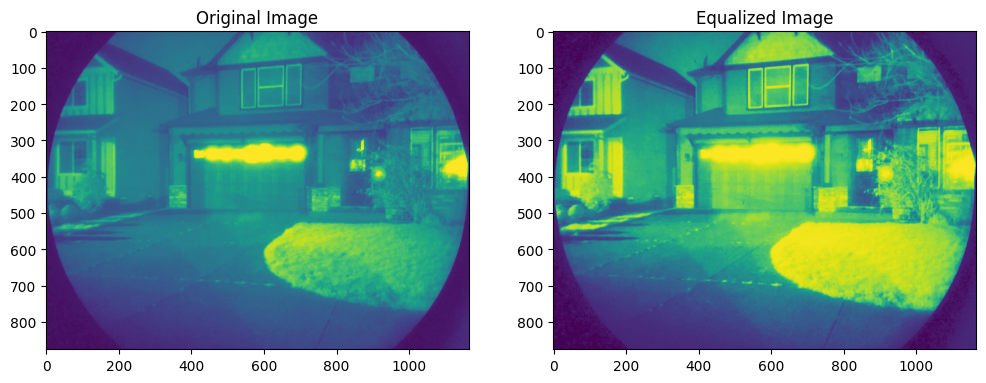

In [22]:
image = Image.open("../images/nightvision.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np)
plt.title("Equalized Image")


### Inference for Applications of Histogram Equalization in nightvision images:
- **Enhancing Low-Light Visibility:** Histogram equalization can improve the visibility of objects in low-light or night vision images by increasing the contrast and brightness. By redistributing the pixel intensities, you can reveal details that may be hidden in dark regions, making it easier to detect objects and navigate in low-light conditions.

#### **Task5: Histogram Equalization for low contrast images**

Text(0.5, 1.0, 'Equalized Image')

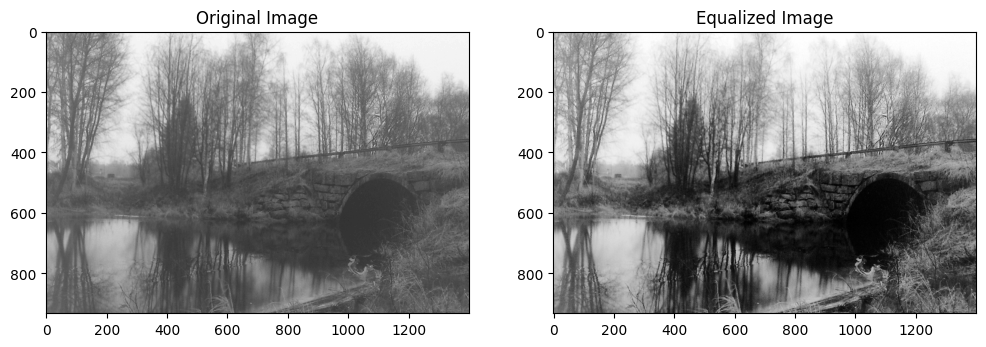

In [23]:
image = Image.open("../images/lowcontrast.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np, cmap='gray')
plt.title("Equalized Image")


### Inference for Low Contrast Images:
Histogram equalization is particularly effective for enhancing the contrast of low contrast images by redistributing the pixel intensities to cover the full intensity range. By equalizing the histogram, you can reveal details and features that may be hidden in dark or bright regions, resulting in a visually improved image with better contrast and clarity.

#### **Task6: Multi-scale Histogram Equalization**

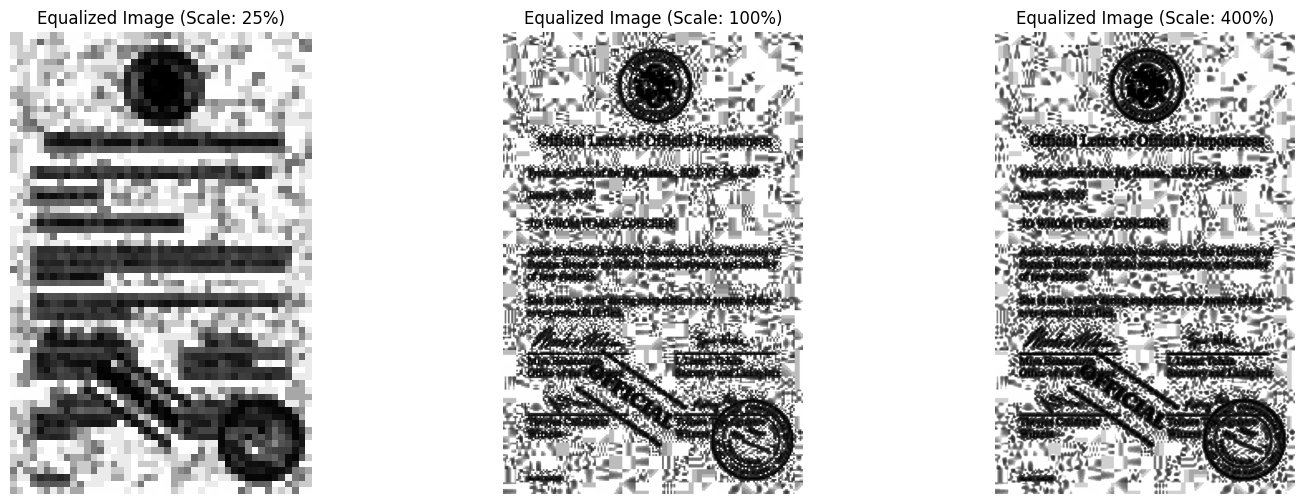

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and convert to grayscale
image = Image.open('../images/document.png').convert('L')
image_np = np.array(image)

# Rescale the image to different scales
scales = [0.25, 1.0, 4.0]  # 25%, 100%, 400%
rescaled_images = [image.resize((int(image.width * scale), int(image.height * scale))) for scale in scales]

# Apply histogram equalization to each rescaled image
equalized_images = [Image.fromarray(standard_hist_eq(np.array(img))) for img in rescaled_images]

# Display the original and equalized images at different scales
plt.figure(figsize=(18, 6))

for i, (scale, eq_image) in enumerate(zip(scales, equalized_images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(eq_image, cmap='gray')
    plt.title(f"Equalized Image (Scale: {int(scale*100)}%)")
    plt.axis('off')

plt.show()

### Smaller Scales(25%): 
When the image is resized to a smaller scale, histogram equalization might result in a loss of detail. Fine features may not be as visible due to the lower resolution, and the equalization process might over-enhance certain areas.

### Original Scale (100%): 
At the original scale, histogram equalization generally performs as expected, enhancing contrast while preserving most details.

### Larger Scales (400%): 
Upscaling the image allows more room for details to be enhanced. However, this can also lead to a subtler contrast improvement, as the distribution of pixel intensities becomes more spread out.

#### **Task7: Histogram equalization for Image enhancement**

Text(0.5, 1.0, 'Equalized Image')

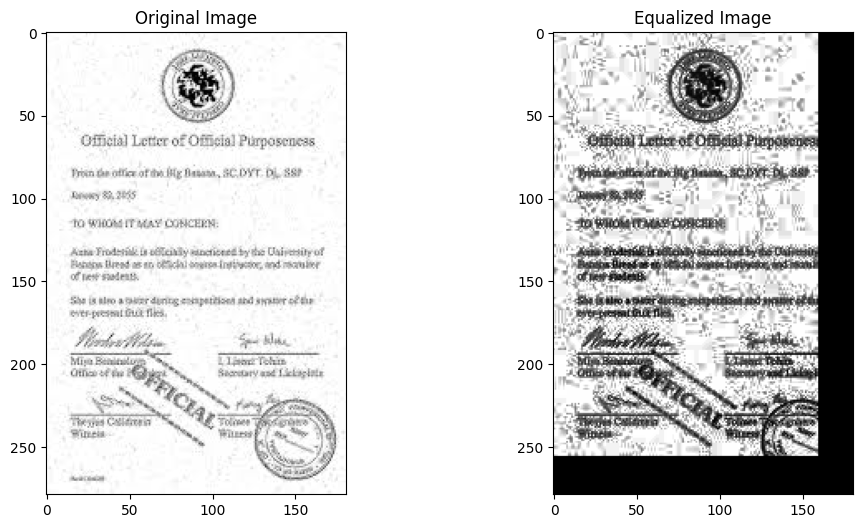

In [26]:
image = Image.open("../images/document.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = clahe(image_np,32,40)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np, cmap='gray')
plt.title("Equalized Image")


Text(0.5, 1.0, 'Enahanced Image')

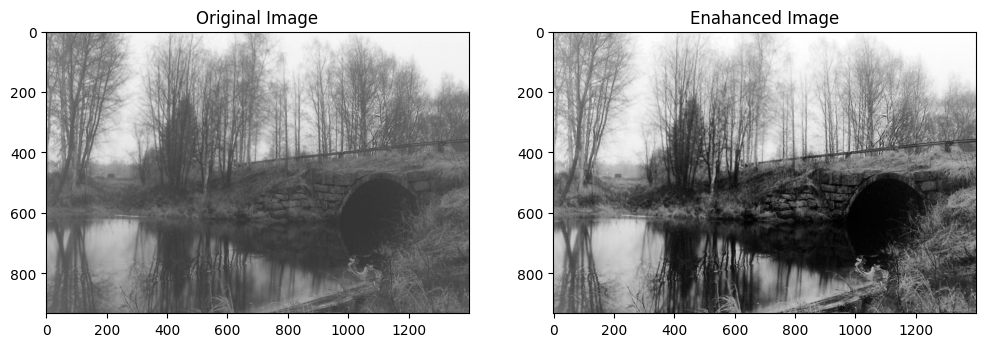

In [28]:
image = Image.open("../images/lowcontrast.png").convert('L')
image_np = np.array(image)

#Applying standard histogram equalization
equalized_image_np = standard_hist_eq(image_np)
equalized_image = Image.fromarray(equalized_image_np)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_np, cmap='gray')
plt.title("Enahanced Image")


Histogram equalisation enhaces the text in the image, making it more readable and improving the overall contrast. The background is also enhanced, making the image more visually appealing and suitable for analysis or display.

#### **Task8: Histogram Equalization for Image Segmentation**

Text(0.5, 1.0, 'Histogram Equalization')

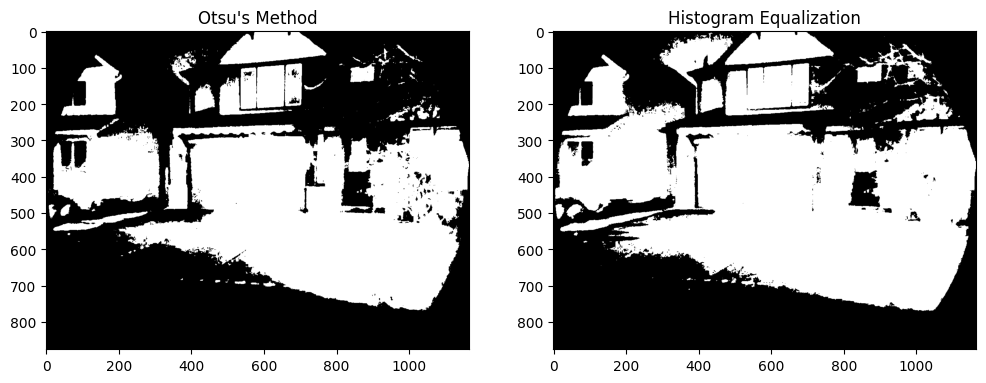

In [42]:
image = Image.open("../images/nightvision.png").convert('L')
image_np = np.array(image)

#Applying segmentation using otsu's method
_, thresholded_image = cv2.threshold(image_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresholded_image = Image.fromarray(thresholded_image)

#Applying segmentation using histogram equalization
equalized_image_np = standard_hist_eq(image_np)
_, equalized_image = cv2.threshold(equalized_image_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
equalized_image = Image.fromarray(equalized_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Otsu's Method")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")

#### Inference for Image Segmentation:
Histogram equalization can be used for image segmentation by enhancing the contrast between different regions of the image. By equalizing the histogram, you can improve the distinction between objects and background, making it easier to separate different regions based on intensity values. This can be useful for tasks such as object detection, feature extraction, and image analysis.

Thresholding after histogram equalization can help isolate specific regions of interest based on intensity values, creating clear boundaries between objects and background. By applying histogram equalization followed by thresholding, you can enhance the segmentation of the image and extract meaningful information from different regions.